In [1]:
import optimal_transport_V2 as ot
import mass_update_V2 as mu
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.stats import beta
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps):
    Y = np.vstack([
        np.column_stack([np.random.beta(con, con, Z - 4*m_cont),
                         np.random.beta(con, con, Z - 4*m_cont)]),
        np.column_stack([np.random.beta(1,l_cont,m_cont),
                         np.random.beta(1,l_cont,m_cont)]),
        np.column_stack([np.random.beta(1,l_cont,m_cont),
                         np.random.beta(l_cont,1,m_cont)]),
        np.column_stack([np.random.beta(l_cont,1,m_cont),
                         np.random.beta(1,l_cont,m_cont)]),
        np.column_stack([np.random.beta(l_cont,1,m_cont),
                         np.random.beta(l_cont,1,m_cont)])
    ])
    N = np.shape(Y)[0]
    density = ot.make_product_beta_density(con,con,con,con,freq)

    fig, axes = plt.subplots(len(lams)+1,2,figsize=(10,20))
    axLastA = axes[len(lams),0]
    axLastB = axes[len(lams),1]
    bestObjs = np.zeros(len(lams))

    # NEW: store best weights for each lambda (for post-loop 3D plots)
    best_weights_all = []

    k = 0
    for lam in lams:
        print("Now working on lambda = "+str(lam))
        ax = axes[k,0]
        bestWeights,objVals,wassers,klCosts = mu.mass_update_repeated_runner(
            Y,numReps,np.ones(N),density,"absolute",.5,lam,
            traceCanvas=ax,upperLimOnTracePlot=.045)
        bestObjs[k] = min(wassers)

        ax = axes[k,1]
        sc = ax.scatter(Y[:,0],Y[:,1],c=bestWeights,cmap="viridis",vmin = 0,vmax = .043)
        fig.colorbar(sc,ax=ax,label="Mass")
        ax.set_title("Best Masses over the 10 optimizations")
        axLastA.plot(np.sort(bestWeights),alpha=0.3)

        # NEW: stash the weights for this lambda
        best_weights_all.append(bestWeights.copy())

        k = k+1

    axLastA.set_title("Best masses over different Lambdas")
    axLastB.scatter(lams,bestObjs)
    axLastB.set_xlabel("lambda")
    axLastB.set_ylabel("Value of the W2^2 at best")

    plt.suptitle("Beta Product Density: Concentration = "+str(con)+". 1 Uniform Dataset. 10 Mass Inits." )
    plt.tight_layout()
    plt.show()

    # ===== NEW: one 3D figure AFTER the loop, 2 panels per lambda =====
    bins = freq+1
    xedges = np.linspace(0,1,bins+1)
    yedges = np.linspace(0,1,bins+1)
    dx = (xedges[1]-xedges[0])
    dy = (yedges[1]-yedges[0])

    fig3d = plt.figure(figsize=(12, 3.6*len(lams)))
    for i, lam in enumerate(lams):
        w = best_weights_all[i]

        # unweighted counts
        H, _, _  = np.histogram2d(Y[:,0], Y[:,1], bins=[xedges, yedges])
        # weighted counts (by best weights)
        Hw, _, _ = np.histogram2d(Y[:,0], Y[:,1], bins=[xedges, yedges], weights=w)

        # coords for bars
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
        xpos = xpos.ravel(); ypos = ypos.ravel()
        zpos = np.zeros_like(xpos)
        DX = dx*np.ones_like(xpos); DY = dy*np.ones_like(ypos)

        # left: unweighted
        axL = fig3d.add_subplot(len(lams), 2, 2*i+1, projection='3d')
        axL.bar3d(xpos, ypos, zpos, DX, DY, H.ravel(), shade=True)
        axL.set_xlim(0,1); axL.set_ylim(0,1)
        axL.set_xlabel('x'); axL.set_ylabel('y'); axL.set_zlabel('Count')
        axL.set_title('Original X_data')

        # right: weighted
        axR = fig3d.add_subplot(len(lams), 2, 2*i+2, projection='3d')
        axR.bar3d(xpos, ypos, zpos, DX, DY, Hw.ravel(), shade=True)
        axR.set_xlim(0,1); axR.set_ylim(0,1)
        axR.set_xlabel('x'); axR.set_ylabel('y'); axR.set_zlabel('Weighted count')
        axR.set_title(f'Resampled (λ = {lam})')

    plt.tight_layout()
    plt.show()


Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 50

Now working on lambda = 0
Now working on lambda = 10
Now working on lambda = 20
Now working on lambda = 30
Now working on lambda = 40
Now working on lambda = 50
Now working on lambda = 60


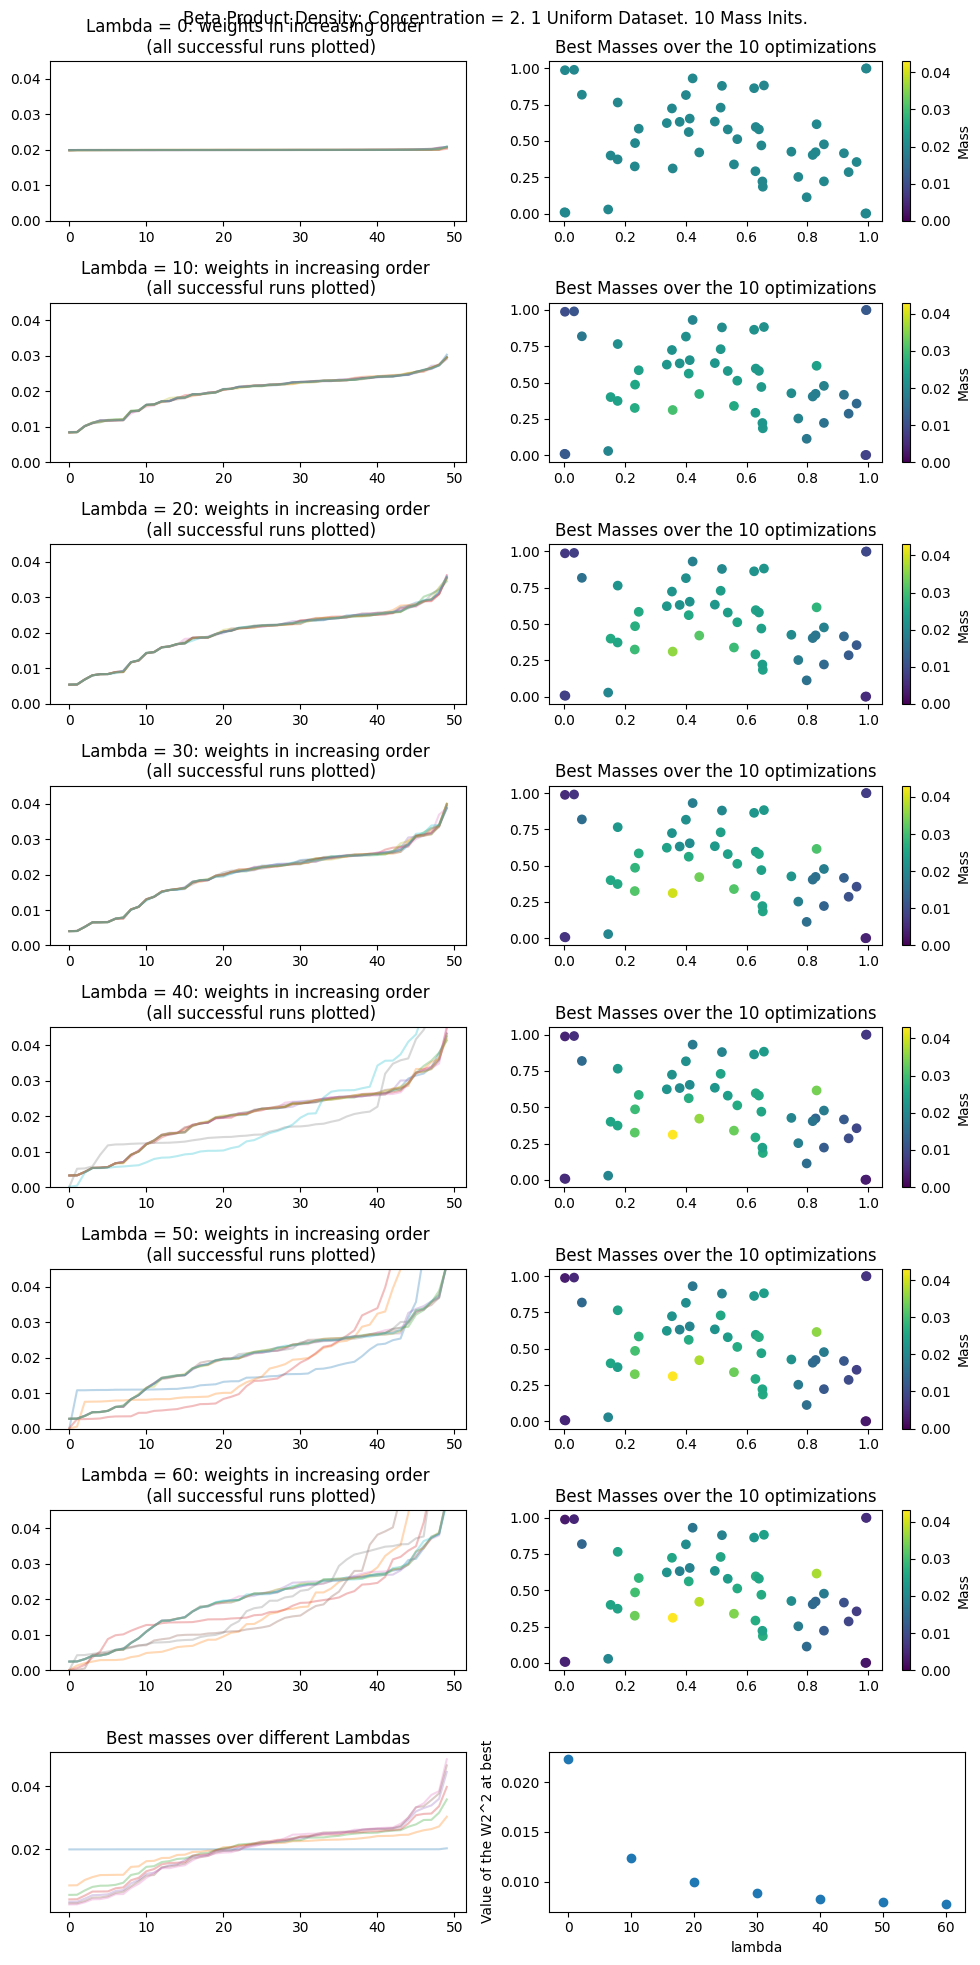

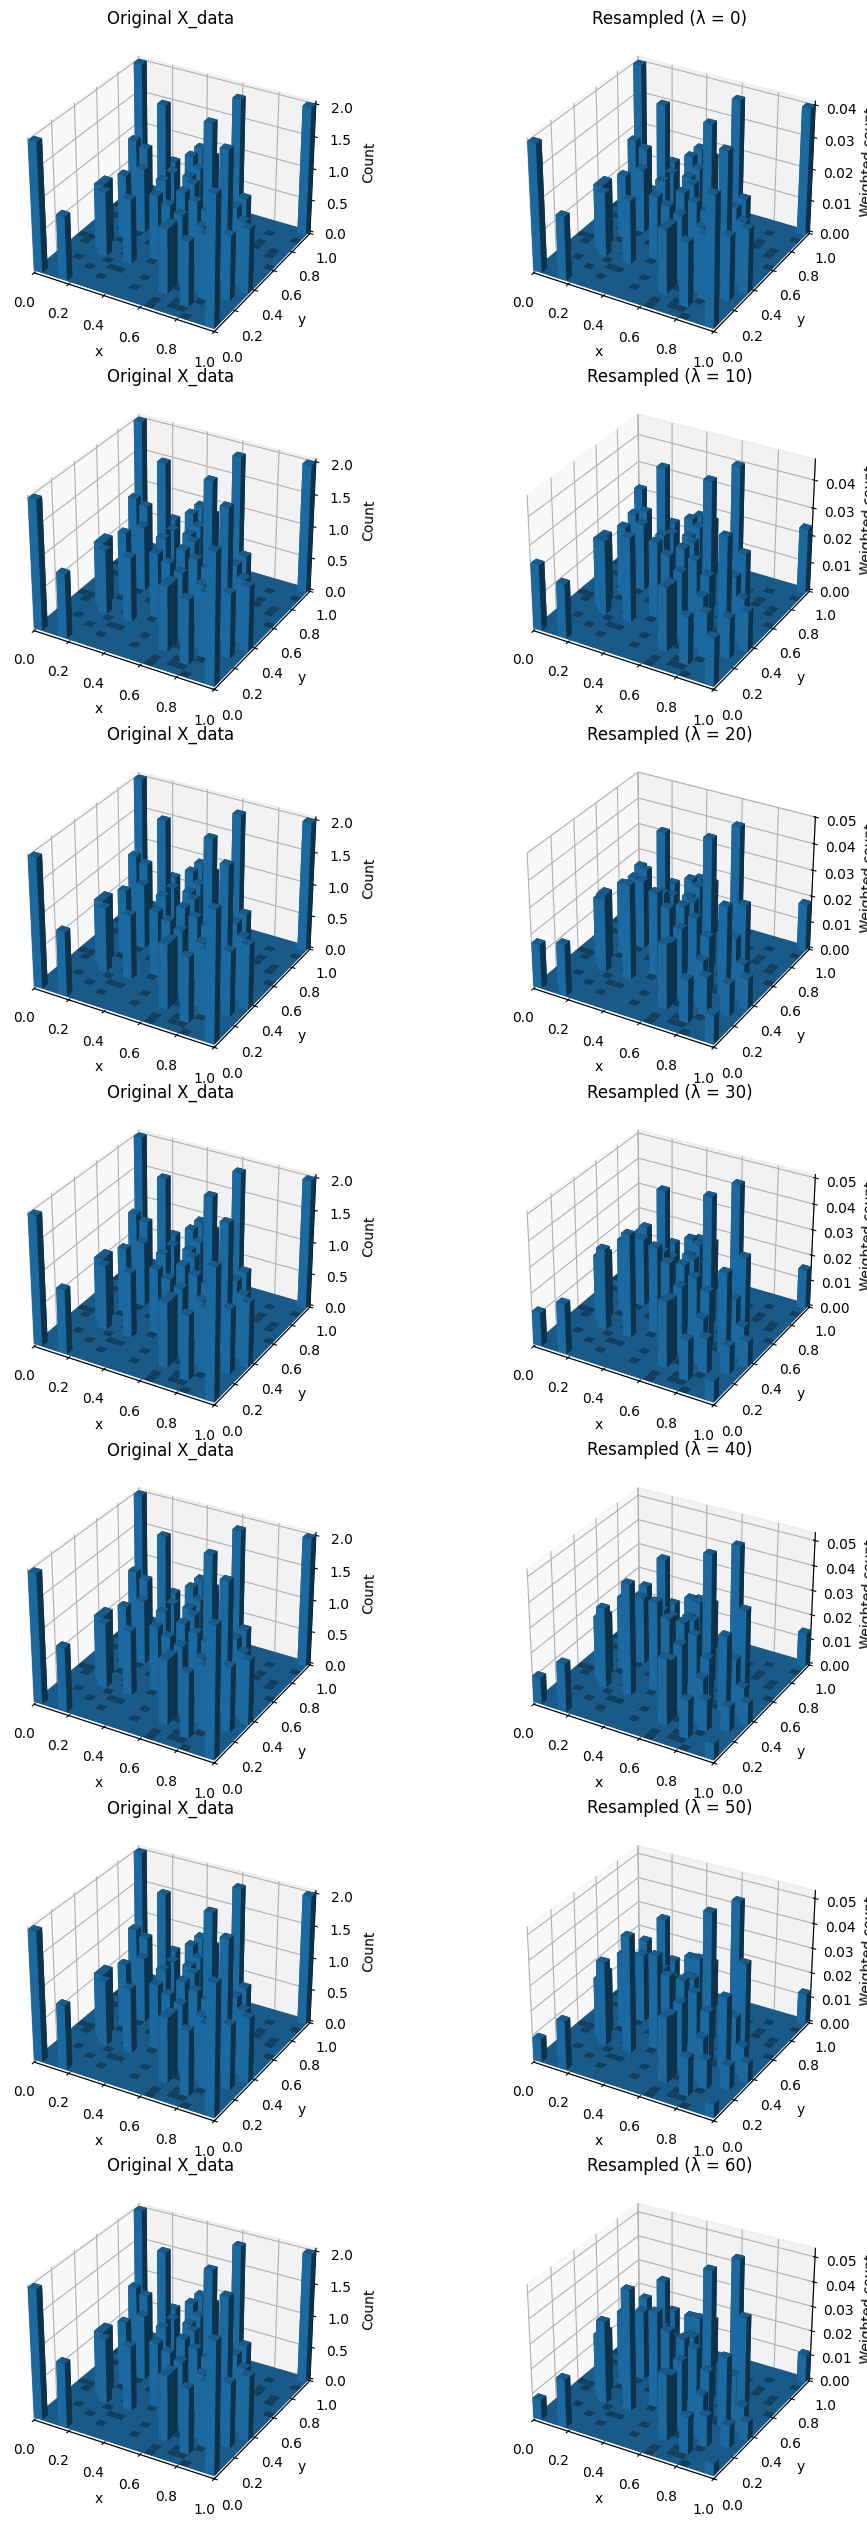

In [3]:
np.random.seed(1)
Z = 50
l_cont = 100
m_cont = 2
lams = [0,10,20,30,40,50,60]
con = 2 
freq = 20
numReps = 10
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps)

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 100

Now working on lambda = 0
Now working on lambda = 10
Now working on lambda = 20
Now working on lambda = 30
Now working on lambda = 40
Now working on lambda = 50
Now working on lambda = 60


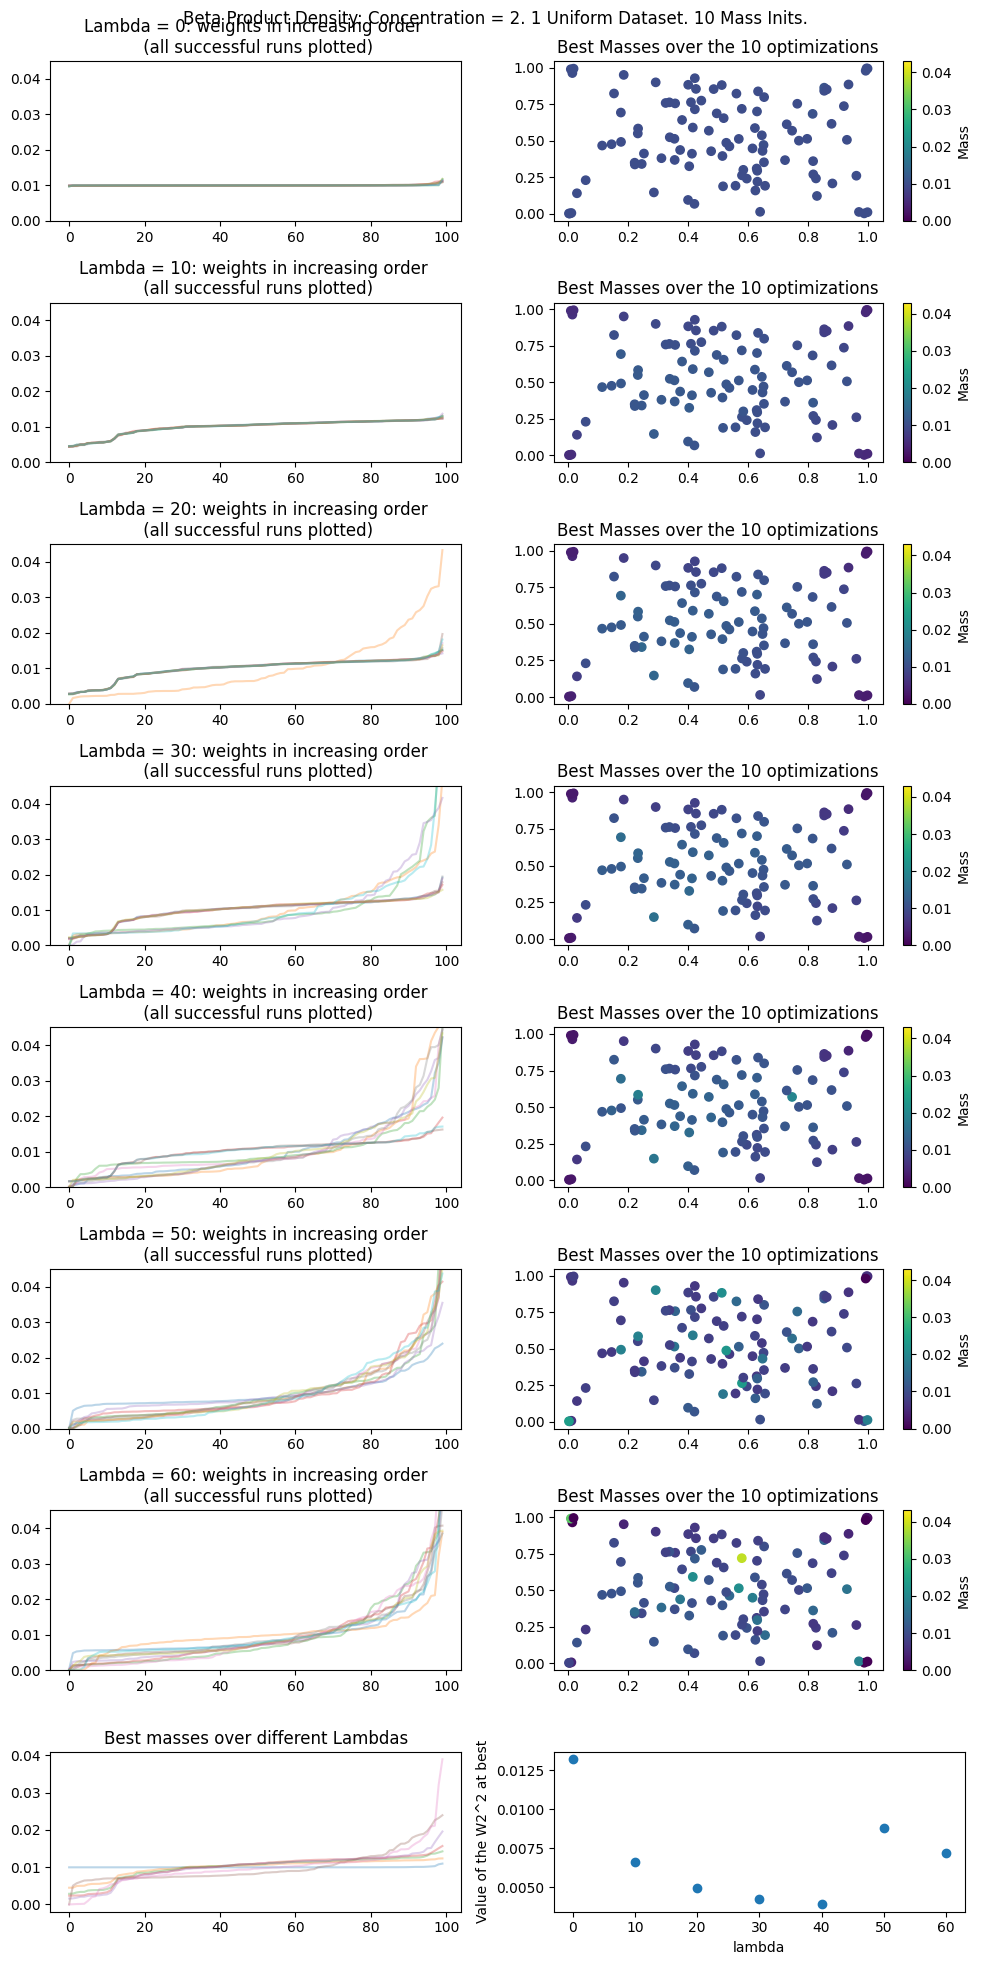

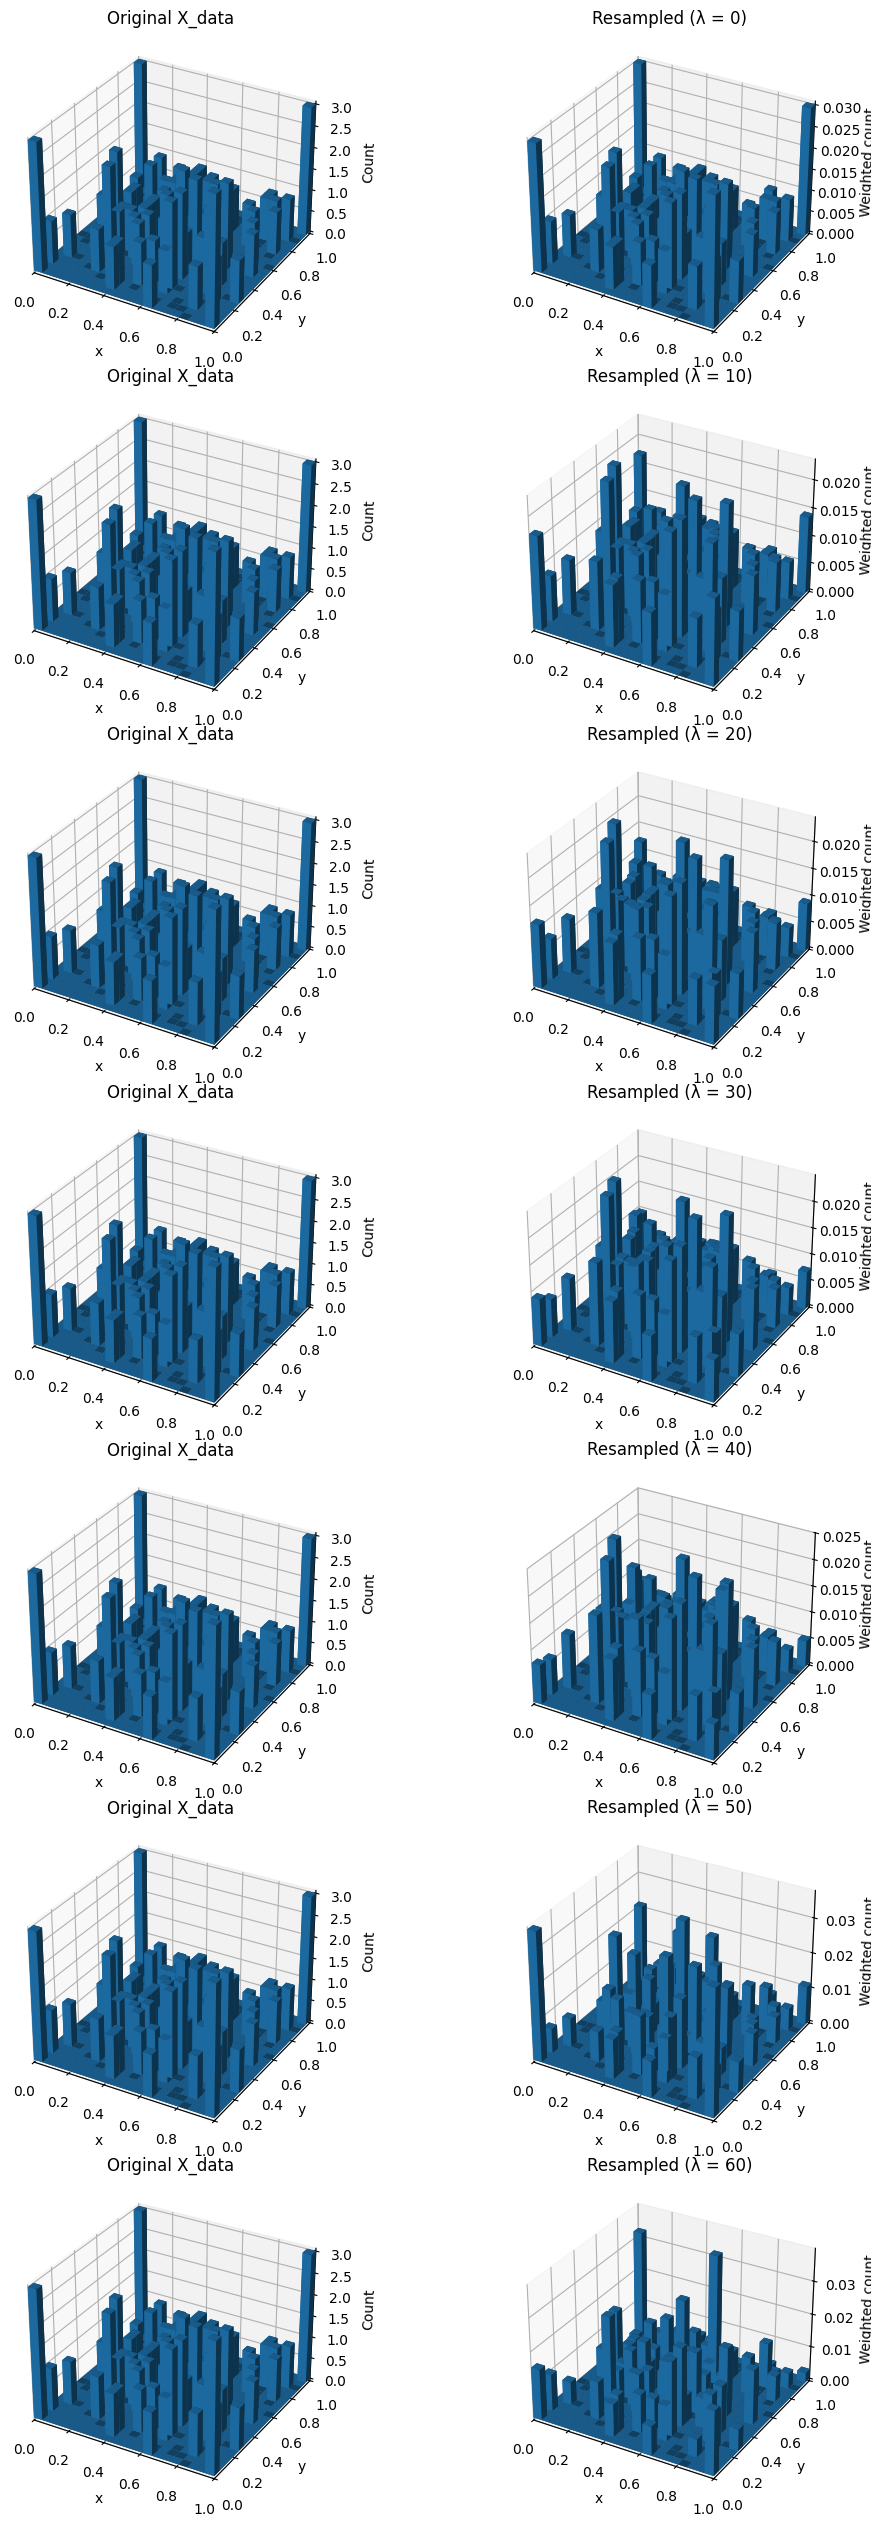

In [4]:
np.random.seed(1)
Z = 100
l_cont = 100
m_cont = 3
lams = [0,10,20,30,40,50,60]
con=2
freq = 20
numReps = 10
runBetaExperiment(Z,m_cont,l_cont,lams,con,freq,numReps)

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 300

In [5]:
np.random.seed(1)
Z = 300
m_cont = 12
l_cont = 100
lams = [0,10,20,30,40,50,60]
con=5
freq = 20
numReps = 10
runBetaExperiment1(Z,m_cont,lams,con,freq,numReps)

NameError: name 'runBetaExperiment1' is not defined

Source Density: $Beta(2,2) \times Beta(2,2)$

Data: $Beta(2,2) \times Beta(2,2)$ and contminations $[Beta(1,100), Beta(100,1)]^2$ at each corner; size: 1000

In [6]:
np.random.seed(1)
Z = 1000
m_cont = 35
l_cont = 100
lams = [0,10,20,30,40,50,60]
con=5
freq = 20
numReps = 10
runBetaExperiment1(Z,m_cont,lams,con,freq,numReps)

NameError: name 'runBetaExperiment1' is not defined